<a href="https://colab.research.google.com/github/buzzaggwd/NLP/blob/main/npl_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [46]:
PATH_TO_FILE: str = '/content/education-career-success_1.csv'
df = pd.read_csv(PATH_TO_FILE)

In [47]:
df

,Age,Job_Offers
0,24,5
1,21,4
2,28,0
3,25,1
4,22,4
...,...,...
4995,26,5
4996,18,5
4997,19,2
4998,19,5


In [48]:
def linear_regression(df: pd.DataFrame) -> list[float]:
  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values
  X_b = np.c_[np.ones((len(X), 1)), X]
  theta = np.linalg.lstsq(X_b, y, rcond=None)[0]
  return theta.flatten().tolist()

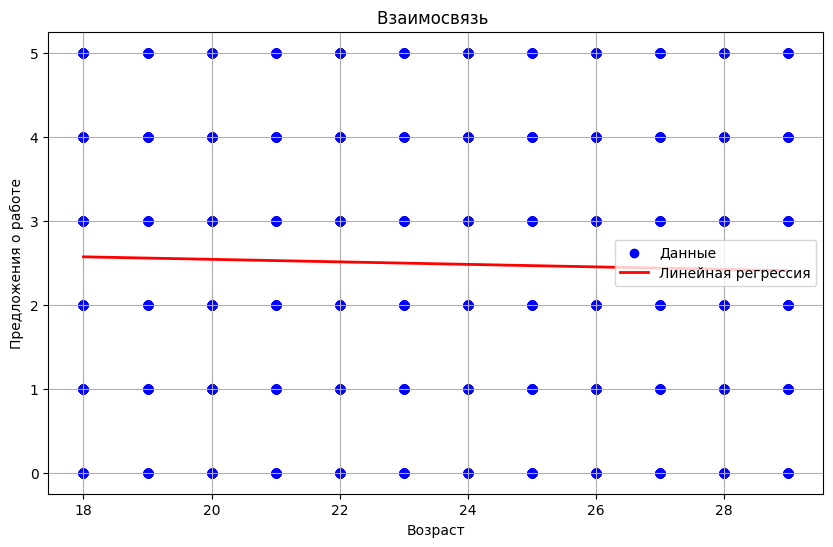

In [49]:
coefficients = linear_regression(df)
intercept, slope = coefficients

X_plot = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
y_pred = intercept + slope * X_plot

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Job_Offers'], color='blue', label='Данные')
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('Возраст')
plt.ylabel('Предложения о работе')
plt.title('Взаимосвязь ')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
def activation_func(x: list[float]) -> list[float]:
  return [1 / (1 + math.exp(-xi)) for xi in x]

![neuron](https://nickmccullum.com/images/python-deep-learning/understanding-neurons-deep-learning/activation-function.png)

In [51]:
def neuron(df: pd.DataFrame):
  coefficients = linear_regression(df)
  intercept = coefficients[0]
  feature_coeffs = coefficients[1:]
  linear_combination = []
  for index, row in df.iloc[:, :-1].iterrows():
      value = intercept
      for i, feature in enumerate(row):
          value += feature * feature_coeffs[i]
      linear_combination.append(value)
  result = activation_func(linear_combination)
  return result

print(neuron(df))

[0.9227600382735301, 0.9258998611418092, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789, 0.9227600382735301, 0.9194987398814248, 0.9269201100816803, 0.9227600382735301, 0.9183840059033842, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789, 0.9258998611418092, 0.9216866185255069, 0.9216866185255069, 0.9269201100816803, 0.9238199610325403, 0.9248665233083789, 0.9279274051590447, 0.9216866185255069, 0.917255224832923, 0.9238199610325403, 0.9279274051590447, 0.917255224832923, 0.9248665233083789, 0.9289218808622066, 0.917255224832923, 0.9194987398814248, 0.9238199610325403, 0.917255224832923, 0.9205995648453472, 0.9289218808622066, 0.9183840059033842, 0.9183840059033842, 0.9194987398814248, 0.917255224832923, 0.917255224832923, 0.9269201100816803, 0.917255224832923, 0.9227600382735301, 0.9258998611418092, 0.9205995648453472, 0.9269201100816803, 0.9248665233083789, 0.9269201100816803, 0.9227600382735301, 0.9248665233083789, 0.9205995648453472, 0.9227600382735301, 0.9279